In [79]:
import pandas as pd
import numpy as np
from sklearn import tree
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_graphviz
import pydotplus
%matplotlib inline

In [80]:
dataset=pd.read_csv('bank-additional-full.csv',sep=";")
dataset.shape

(41188, 21)

In [81]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Data Preparation 

In [82]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [83]:
dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [84]:
for feature in dataset.columns:
    print(dataset[feature].value_counts())
    print('-----------------------------------------------------')

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
-----------------------------------------------------
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
-----------------------------------------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
-----------------------------------------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
-------------------

In [85]:
# split of features as numeric and factor features

numc = list(dataset.select_dtypes(exclude=['object']).columns.values)
print(numc)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

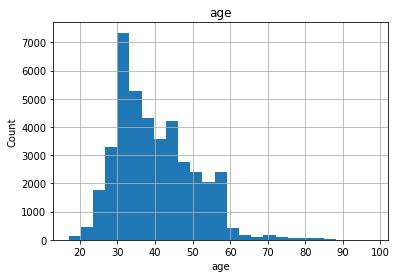

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

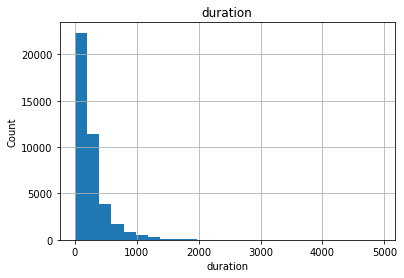

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

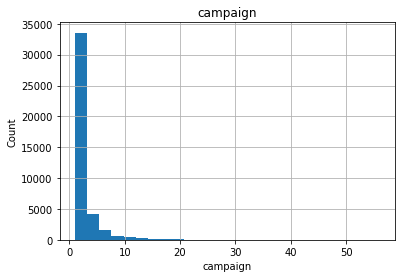

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

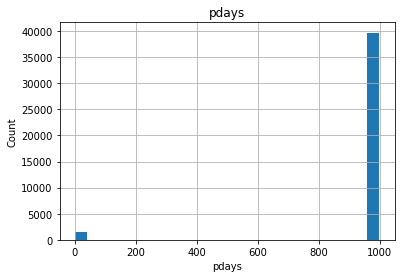

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

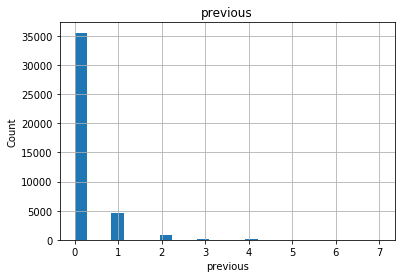

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

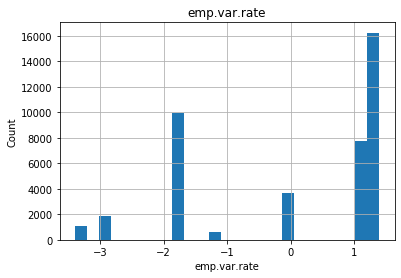

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

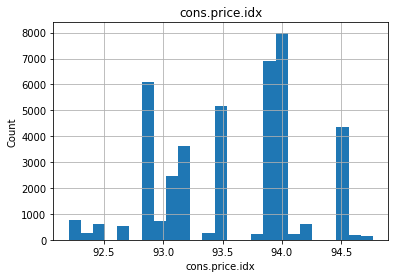

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

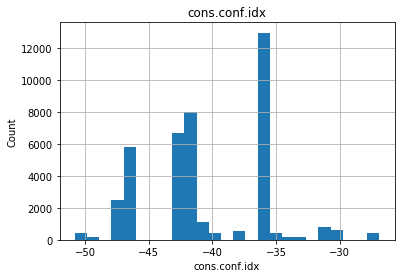

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

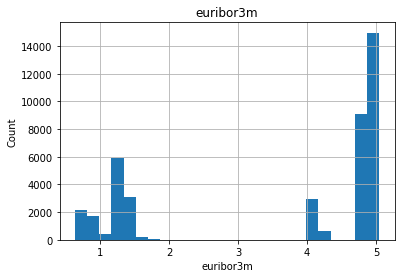

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

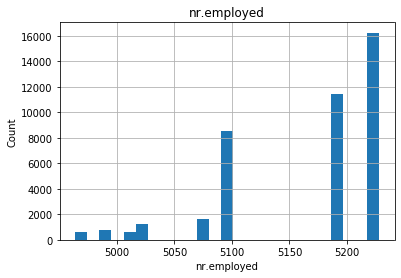

In [86]:
for feature in numc:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

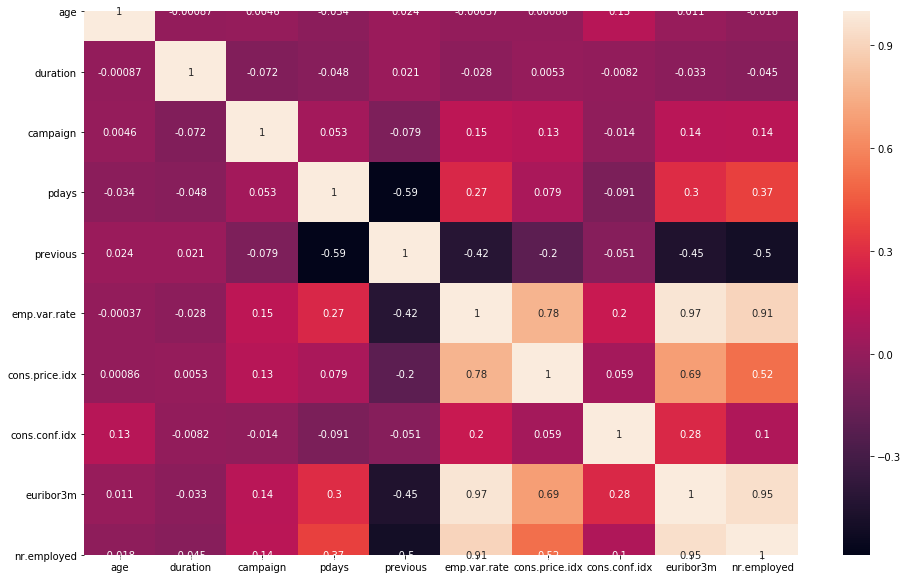

In [87]:
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(dataset[numc].corr(),annot=True)


In [88]:
dataset.drop(['emp.var.rate'],axis=1,inplace=True)
dataset.drop(['euribor3m'],axis=1,inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

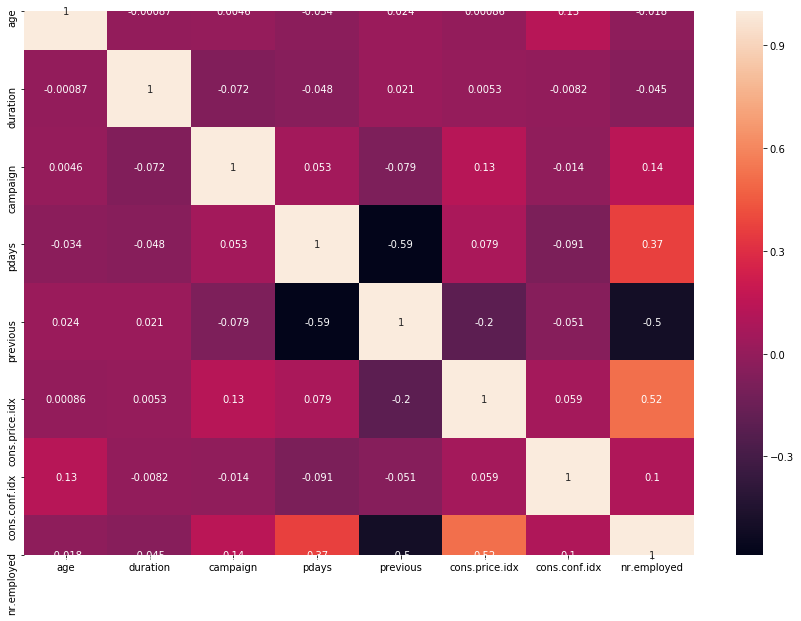

In [89]:
plt.figure(figsize = (15,10))     # Size of the figure
sns.heatmap(dataset.corr(),annot=True)


In [90]:
# selecting the categorical types column
cat_cols = list(dataset.select_dtypes(include=['object']).columns.values)
print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [91]:
cat_cols.remove('y')

In [92]:
# Creating a Dummy Variable
for col in cat_cols:
    freqs=dataset[col].value_counts()
    k=freqs.index[freqs>20][:-1]
    for cat in k:
        name=col+'_'+cat
        dataset[name]=(dataset[col]==cat).astype(int)
    del dataset[col]
    print(col)

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome


In [93]:
# Converting response variable to class 0 and 1.
dataset['y']=(dataset['y']=='yes').astype(int)

In [94]:
dataset.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y,job_admin.,...,month_apr,month_oct,month_sep,month_mar,day_of_week_thu,day_of_week_mon,day_of_week_wed,day_of_week_tue,poutcome_nonexistent,poutcome_failure
0,56,261,1,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,57,149,1,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,37,226,1,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,40,151,1,999,0,93.994,-36.4,5191.0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,56,307,1,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [95]:
dataset.shape

(41188, 50)

In [96]:
dataset.isnull().sum()

age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
cons.price.idx                   0
cons.conf.idx                    0
nr.employed                      0
y                                0
job_admin.                       0
job_blue-collar                  0
job_technician                   0
job_services                     0
job_management                   0
job_retired                      0
job_entrepreneur                 0
job_self-employed                0
job_housemaid                    0
job_unemployed                   0
job_student                      0
marital_married                  0
marital_single                   0
marital_divorced                 0
education_university.degree      0
education_high.school            0
education_basic.9y               0
education_professional.course    0
education_basic.4y               0
education_basic.6y  

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['y'],train_size=0.7,random_state=100)

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


In [99]:
clf = RandomForestClassifier()

In [100]:
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [5,10,20,25,30,35],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [101]:
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=3,scoring='roc_auc',cv=5,n_jobs=-1,random_state=100)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [102]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [104]:
report(random_search.cv_results_,5) 

Model with rank: 1
Mean validation score: 1.000 (std: 0.00000)
Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 5, 'max_depth': 5, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}

Model with rank: 1
Mean validation score: 1.000 (std: 0.00000)
Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 35, 'max_depth': 50, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}

Model with rank: 1
Mean validation score: 1.000 (std: 0.00000)
Parameters: {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 20, 'max_features': 35, 'max_depth': 30, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}



In [105]:
rf=random_search.best_estimator_

In [107]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
roc_auc_score(y_test,rf.predict(X_test))

0.9308972503617945

In [ ]:
from sklearn.model_selection import cross_val_score

In [125]:
score=cross_val_score(rf,X_train,y_train,cv=10)
score.mean()

0.985779616322333

## Xgboost

In [109]:
import xgboost

In [115]:
classifier=xgboost.XGBClassifier()

In [111]:
params={
    "learning rate"   :[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth"       :[3,4,5,6,7,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma"           :[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [116]:
random_search = RandomizedSearchCV(classifier, param_distributions=params,
                                   n_iter=5,scoring='roc_auc',cv=5,n_jobs=-1,random_state=100)
random_search.fit(X_train, y_train)

[20:44:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { learning rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'co

In [117]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning rate=0.1, learning_rate=0.300000012, max_delta_step=0,
              max_depth=3, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [118]:
xgb=random_search.best_estimator_

In [119]:
xgb.fit(X_train,y_train)

[20:47:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { learning rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning rate=0.1, learning_rate=0.300000012, max_delta_step=0,
              max_depth=3, min_child_weight=7, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [121]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 1.000 (std: 0.00000)
Parameters: {'min_child_weight': 7, 'max_depth': 3, 'learning rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7}

Model with rank: 1
Mean validation score: 1.000 (std: 0.00000)
Parameters: {'min_child_weight': 7, 'max_depth': 4, 'learning rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.3}

Model with rank: 1
Mean validation score: 1.000 (std: 0.00000)
Parameters: {'min_child_weight': 5, 'max_depth': 10, 'learning rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.3}

Model with rank: 1
Mean validation score: 1.000 (std: 0.00000)
Parameters: {'min_child_weight': 5, 'max_depth': 7, 'learning rate': 0.25, 'gamma': 0.3, 'colsample_bytree': 0.4}

Model with rank: 1
Mean validation score: 1.000 (std: 0.00000)
Parameters: {'min_child_weight': 3, 'max_depth': 5, 'learning rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.7}



In [120]:
roc_auc_score(y_test,xgb.predict(X_test))

1.0

In [122]:
from sklearn.model_selection import cross_val_score

In [124]:
score=cross_val_score(xgb,X_train,y_train,cv=10)
score.mean()

[20:53:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { learning rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:53:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { learning rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:53:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { learning rate } might not be used.

  This may not be accurate due to some parameters are only used in

1.0